## Non-Probabilistic PCA
### Maximization of the Variance in the projected Space
### Linear Independencies of eigenvectors of the Covariancre matrix
### Lagrangian construction
### Mean Squared Error by using the discarded eigenvalues

In [20]:
%matplotlib inline
import numpy as np 
import sklearn.preprocessing
import sklearn.datasets
import pandas as pd
import sklearn.model_selection
import numpy.random
import math
import sklearn.metrics
import matplotlib.pyplot as plt
import cv2
numpy.random.seed(42)

In [2]:
mnist = sklearn.datasets.fetch_openml('mnist_784', version=1)
X, y= (mnist["data"], mnist["target"])

In [10]:
y[0:20]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1', '7', '2', '8', '6', '9'], dtype=object)

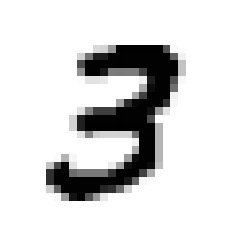

In [13]:
digit = X[7]
plt.imshow(digit.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

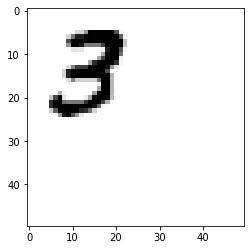

In [69]:
#padding the image
digit_padded = np.zeros((50, 50))
digit_padded[0:28, 0:28] = digit.reshape(28, 28)
plt.imshow(digit_padded, cmap="binary")
plt.show()

In [63]:
np.max(digit_padded)

255.0

In [64]:
observations[0, :]

array([0., 0., 0., ..., 0., 0., 0.])

In [133]:
#No need to process the pixels intensity values because all will be on the same scale ([0, 255])
m = 1200
observations = np.zeros((m, digit_padded.shape[0]*digit_padded.shape[1]))
observations.shape

(1200, 2500)

In [134]:
np.random.randn(10)

array([-1.7568687 , -1.26898258, -0.8888597 , -0.1597485 , -1.01416422,
        0.33897589, -0.2322735 ,  0.01054571,  1.14025055, -1.18023173])

In [149]:
#Translational and rotational transormation in the x and y axis

count = 0

for i in range(0, 20):
    for j in range(0, 20):
        for k in [0, 45, 180]:#Only three rotations angles
            signx = 1
            signy = 1
            #Just to allow shifting backward
            if (np.random.randn() > 0):
                signx = 1
            else:
                signx = -1

            if (np.random.randn() > 0):
                signy = 1
            else:
                signy = -1
            #print(signx, signy)
            M = cv2.getRotationMatrix2D((digit_padded.shape[1]/2, digit_padded.shape[0]/2), k, 1)
            rotated_digit = cv2.warpAffine(digit_padded,M,(digit_padded.shape[0], digit_padded.shape[1]))
            M = np.float32(np.array([[1, 0, signx*1*i], [0, 1, signy*1*j]]))
            observations[count, :] = (cv2.warpAffine(rotated_digit, M, (digit_padded.shape[0], digit_padded.shape[1]))).reshape(1, -1)

            #plt.imshow(observations[count, :].reshape(digit_padded.shape[0], digit_padded.shape[1]), cmap="binary")
            #plt.show()
            count += 1

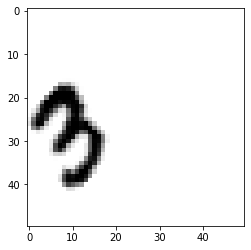

In [150]:
#standard = sklearn.preprocessing.StandardScaler()
#observations = standard.fit_transform(observations)
plt.imshow(observations[10, :].reshape(digit_padded.shape[0], digit_padded.shape[1]), cmap="binary");
plt.show()


In [151]:
#Finding the principle component using simply eigendecomposition instead of SVD
covariance = (1/m) * np.dot(observations.T, observations)#nxn
evalues, evectors = np.linalg.eig(covariance)
print(evectors.shape)
print(evalues[0:10])
evalues = np.real(evalues)
evectors = np.real(evectors)#Because eigenvectors of a real symmetric matrix are real, the imaginary part caused from numerical instability

(2500, 2500)
[897945.78980481+0.j 586216.28693004+0.j 489203.86742101+0.j
 404363.96761416+0.j 339848.72565245+0.j 317535.65329674+0.j
 253971.98660222+0.j 219667.08764411+0.j 207572.15394742+0.j
 171857.41695009+0.j]


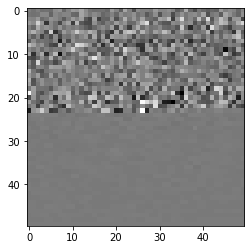

In [152]:
plt.imshow(evectors[0,:].reshape(digit_padded.shape[0], digit_padded.shape[0]), cmap="binary")
plt.show()

(2500,)


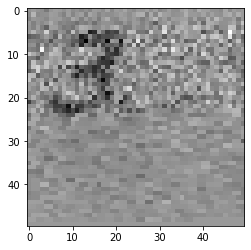

In [158]:
n = 0
#M = digit_padded.shape[0]*digit_padded.shape[1]
M = 800
mean = np.mean(observations, axis=0)
#mean = np.zeros((observations.shape[1], 1))
print(mean.shape)
approximation = np.zeros((digit_padded.shape[0]*digit_padded.shape[1], 1))
for m in range(0, M):
    approximation += (np.dot(observations[n, :].reshape(1, -1), evectors[m, :].reshape(-1, 1)) - np.dot(mean.reshape(1, -1), evectors[m, :].reshape(-1, 1)) )* evectors[m, :].reshape(-1, 1)

approximation += mean.reshape(-1, 1)
plt.imshow(approximation.reshape(digit_padded.shape[0], digit_padded.shape[0]), cmap="binary")
plt.show()

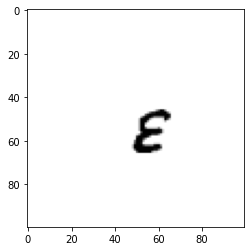

In [34]:
M = cv2.getRotationMatrix2D((digit_padded.shape[1]/2, digit_padded.shape[0]/2), 180, 1)
dst = cv2.warpAffine(digit_padded,M,(digit_padded.shape[0], digit_padded.shape[1]))
plt.imshow(dst, cmap="binary")
plt.show()

### References 
* Chapter 12 from Bishop, C. (2006). Pattern Recognition and Machine Learning. Cambridge: Springer.
* Andrew Ng, Lec 14: (https://www.youtube.com/watch?v=ZZGTuAkF-Hw)
* Andrew Ng, Lec 15: (https://www.youtube.com/watch?v=ZZGTuAkF-Hw)


